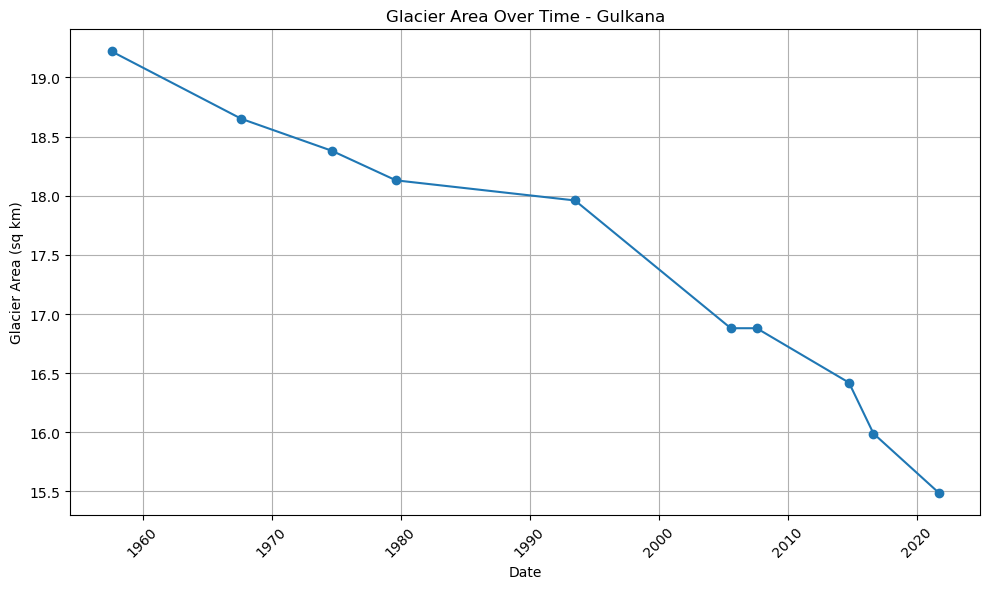

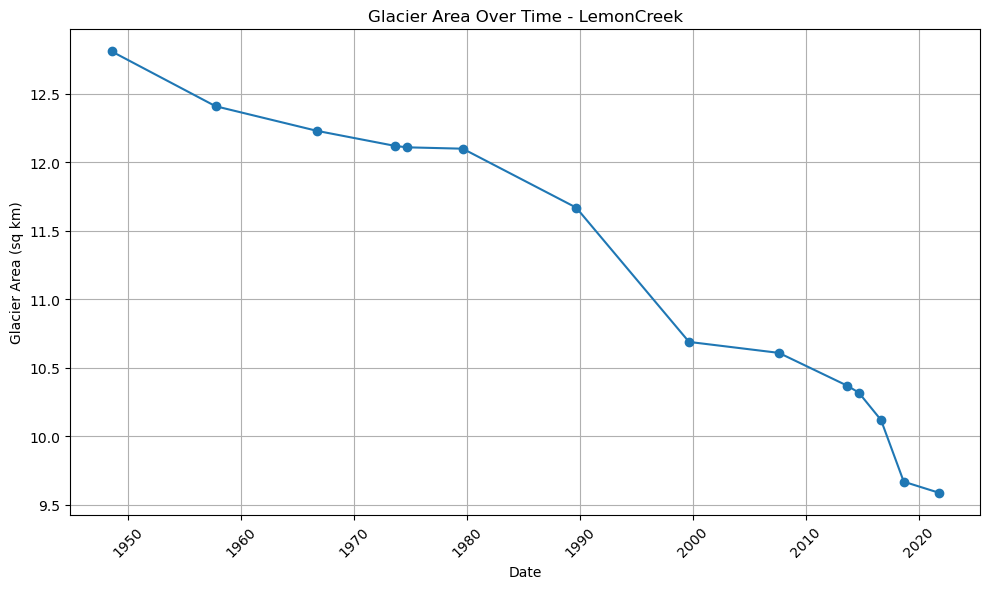

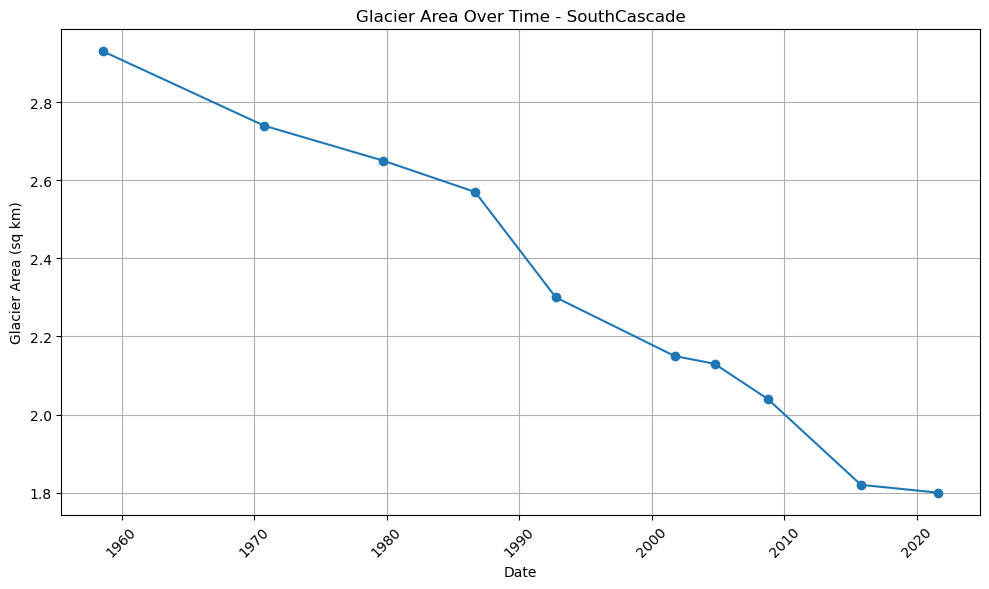

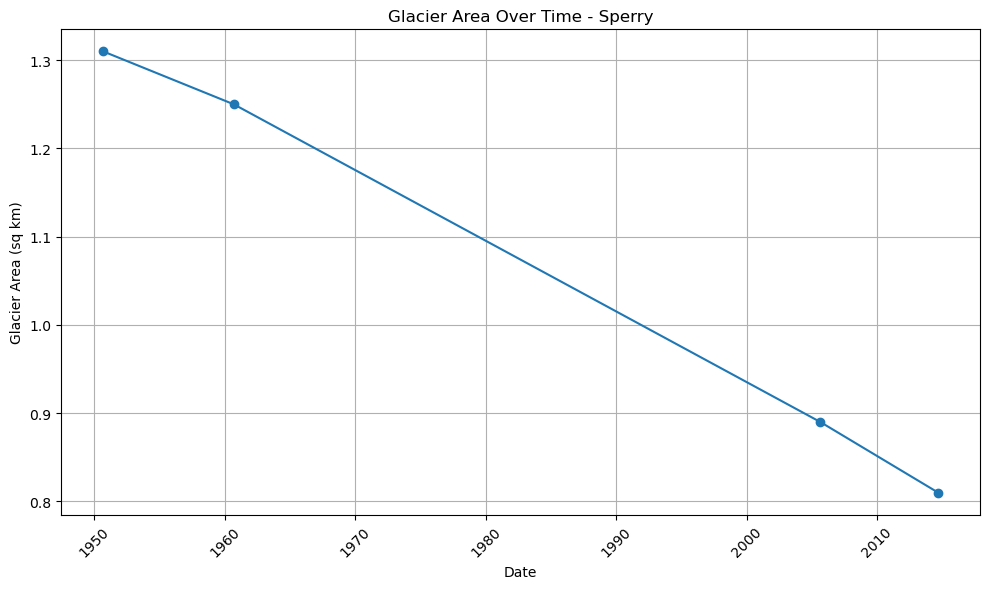

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

# 文件名列表
file_names = [
    r'E:\\Mathematics_Modeling_study\\2025MCM\Data\\Juneau_Glacier_Metadata\\Gulkana_Geodetic_Metadata.csv',
    r'E:\\Mathematics_Modeling_study\\2025MCM\Data\\Juneau_Glacier_Metadata\\LemonCreek_Geodetic_Metadata.csv',
    r'E:\\Mathematics_Modeling_study\\2025MCM\Data\\Juneau_Glacier_Metadata\\SouthCascade_Geodetic_Metadata.csv',
    r'E:\\Mathematics_Modeling_study\\2025MCM\Data\\Juneau_Glacier_Metadata\\Sperry_Geodetic_Metadata.csv'
]

# 读取和处理每个文件
for file_name in file_names:
    # 读取CSV文件
    df = pd.read_csv(file_name)
    
    # 将日期列转换为datetime对象，并按日期排序
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
    df = df.sort_values(by='Date')
    
    # 处理“Glacier Area”列，去除缺失值或无效数据
    df['Glacier Area'] = pd.to_numeric(df['Glacier Area'], errors='coerce')
    df = df.dropna(subset=['Glacier Area'])
    
    # 绘制折线图
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Glacier Area'], marker='o', linestyle='-')
    glacier_name = os.path.splitext(os.path.basename(file_name))[0].replace('_Geodetic_Metadata', '')
    plt.title(f'Glacier Area Over Time - {glacier_name}')
    plt.xlabel('Date')
    plt.ylabel('Glacier Area (sq km)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


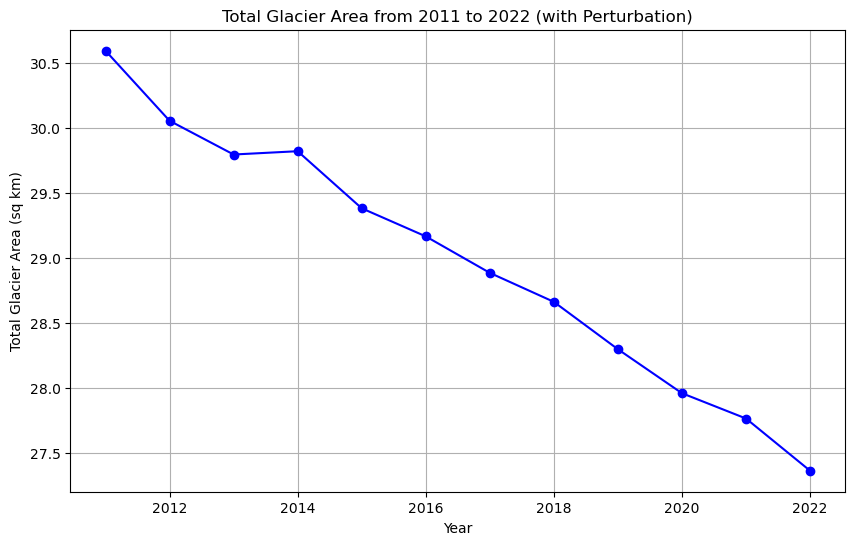

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 原始线性数据
sperry_glacier = np.array([0.845, 0.840, 0.835, 0.830, 0.825, 0.820, 0.815, 0.810, 0.805, 0.800, 0.795, 0.790])
gulkana_glacier = np.array([16.875, 16.750, 16.625, 16.500, 16.375, 16.250, 16.125, 16.000, 15.875, 15.750, 15.625, 15.500])
lemon_creek_glacier = np.array([10.875, 10.750, 10.625, 10.500, 10.375, 10.250, 10.125, 10.000, 9.875, 9.750, 9.625, 9.500])
south_cascade_glacier = np.array([1.975, 1.950, 1.925, 1.900, 1.875, 1.850, 1.825, 1.800, 1.775, 1.750, 1.725, 1.700])

# 添加随机扰动
np.random.seed(42)  # 固定随机种子以获得可重复的结果
perturbation_scale = 0.06 # 扰动的规模

sperry_glacier += np.random.normal(0, perturbation_scale, sperry_glacier.shape)
gulkana_glacier += np.random.normal(0, perturbation_scale, gulkana_glacier.shape)
lemon_creek_glacier += np.random.normal(0, perturbation_scale, lemon_creek_glacier.shape)
south_cascade_glacier += np.random.normal(0, perturbation_scale, south_cascade_glacier.shape)

# 计算每年的总面积
total_area = sperry_glacier + gulkana_glacier + lemon_creek_glacier + south_cascade_glacier

# 创建DataFrame
data = {
    "Year": list(range(2011, 2023)),
    "Total Glacier Area (sq km)": total_area
}

df = pd.DataFrame(data)

# 保存到CSV文件
df.to_csv("nonlinear_total_glacier_area.csv", index=False)

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["Total Glacier Area (sq km)"], marker='o', linestyle='-', color='b')

# 添加标题和标签
plt.title("Total Glacier Area from 2011 to 2022 (with Perturbation)")
plt.xlabel("Year")
plt.ylabel("Total Glacier Area (sq km)")

# 添加网格
plt.grid(True)

# 显示图表
plt.show()


In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression

def predict_next_value(sequence):
    # 准备数据
    X = np.arange(len(sequence)).reshape(-1, 1)
    y = np.array(sequence)

    # 创建并拟合线性回归模型
    model = LinearRegression()
    model.fit(X, y)

    # 预测下一个值
    next_index = np.array([[len(sequence)]])
    next_value = model.predict(next_index)

    return next_value[0]

# 四个序列
air_quality_index = [28.12, 25.30, 23.55, 29.23, 26, 25.57, 22.47, 27.31, 25.73, 18.52, 19.43]
greenhouse_gas_emissions = [71727.76, 113587.49, 95652.89, 76765.20, 51892.62, 56959.98, 49644.26, 49236.73, 104822.60, 66946.88, 66422.68]
methane_emissions = [17100.75, 77764.37, 36337.25, 40263, 13274.75, 15986.25, 11391, 11325.25, 12195, 7062.25, 12616.75]
carbon_dioxide_emission = [54494.40, 35734.69, 59172, 36413.10, 38523.40, 40874.20, 38158.20, 37819.70, 92404.10, 59739.80, 53675.70]

# 预测每个序列的下一个值
next_air_quality = predict_next_value(air_quality_index)
next_greenhouse_gas = predict_next_value(greenhouse_gas_emissions)
next_methane = predict_next_value(methane_emissions)
next_carbon_dioxide = predict_next_value(carbon_dioxide_emission)

print(f"Next Air Quality Index: {next_air_quality:.2f}")
print(f"Next Greenhouse Gas Emissions: {next_greenhouse_gas:.2f}")
print(f"Next Methane Emissions: {next_methane:.2f}")
print(f"Next Carbon Dioxide Emission: {next_carbon_dioxide:.2f}")


Next Air Quality Index: 20.76
Next Greenhouse Gas Emissions: 59811.70
Next Methane Emissions: -648.37
Next Carbon Dioxide Emission: 60313.82


In [11]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings

# 忽略警告信息
warnings.filterwarnings("ignore")

# Methane emissions 序列
methane_emissions = [17100.75, 77764.37, 36337.25, 40263, 13274.75, 15986.25, 11391, 11325.25, 12195, 7062.25, 12616.75]

# 将数据转换为pandas Series
methane_series = pd.Series(methane_emissions)

# 拟合ARIMA模型
# 选择ARIMA的参数 (p, d, q)
# 这里选择 (1, 1, 1) 作为示例，实际应用中可以通过AIC/BIC等指标进行参数优化
model = ARIMA(methane_series, order=(1, 1, 1))
model_fit = model.fit()

# 预测下一个值
forecast = model_fit.forecast(steps=1)
next_methane_emission = forecast.iloc[0]

print(f"Next Methane Emission: {next_methane_emission:.2f}")



Next Methane Emission: 12617.12


In [1]:
import pandas as pd

# 指定xlsx文件路径
xlsx_file_path = 'E:\\Mathematics_Modeling_study\\2025MCM\Data\\Juneau_field_data.xlsx'

# 指定csv文件保存路径
csv_file_path = 'Juneau_field_data.csv'

# 使用pandas读取xlsx文件
df = pd.read_excel(xlsx_file_path, engine='openpyxl')

# 将DataFrame保存为csv文件
df.to_csv(csv_file_path, index=False)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# 创建一个数据框，假设我们有日期和销售额的数据
data = {
    'ds': pd.date_range(start='2020-01-01', periods=100),
    'y': [x + (x * 0.1) * (i % 10) for i, x in enumerate(range(100))]
}
df = pd.DataFrame(data)

# 初始化并拟合模型
model = Prophet()
model.fit(df)

# 生成未来 30 天的日期
future = model.make_future_dataframe(periods=30)

# 进行预测
forecast = model.predict(future)

# 可视化结果
fig = model.plot(forecast)
plt.title('Sales Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

e:\Deep_learning_study\MCM\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


AttributeError: 'Prophet' object has no attribute 'stan_backend'